<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ask the diff between loss and error. https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

# **Following along with work from github**
Review numpys as well

Play around with number of iterations and the learning rate to see changes within the model.
Also create a new variable for DATE (months + date)

In [ ]:
#import csv no need #regression #ETA = LEARNING_RATE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data plotting (imported later in example code?)

In [ ]:
#odd --> plt?

In [ ]:
df = pd.read_csv('Walmart.csv') #variable walmart can also be called df for data frame #single quote works too
#walmart no need #ws = target var

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#notice that there are many multiples of Store so only store unique values as well as Date --> how to know which variables to use from columns for use in dataset/graph
df['Store'].unique() #in seperate cells so does not get overridden #feature

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [ ]:
df['Day'] = df['Date'].str[:-8]

In [ ]:
df['Month'] = df['Date'].str[:-5]
df['Month'] = df['Month'].str[3:]

In [ ]:
df['Dates'] = df['Month'] + str('-') + df['Day']

In [ ]:
df.drop(['Date'], axis=1, inplace=True) #column index, drop --> split into month/date (important feature) create new var combo of month + date date/time library utility func month + date seperate column
#what does this do?
#drops or gets rid of the Date column in index 1 and chooses not to create a new matrix, keeps old
#removes the specified row or column. By specifying the column axis ( axis='columns' ), the drop() method removes the specified column.

Create a new variable New_Date and remove year substring, sort array

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Dates
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,02-05
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,02-12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,02-19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,02-26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,03-05


In [ ]:
df.describe() #count = row #

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   object 
 8   Month         6435 non-null   object 
 9   Dates         6435 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 502.9+ KB


In [ ]:
y = df['Weekly_Sales'].values #supervised learning needs labels and features index, extract values for numpy array from column #takes out weekly sales?

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y.shape

(6435,)

In [ ]:
y[:5] #first 5 index values; 0-4 #weights large mean square loss may overflow (compared to describe)

array([1643690.9 , 1641957.44, 1611968.17, 1409727.59, 1554806.68])

In [ ]:
y_scaled = y/100000 #scalar values? --> scale down values

In [ ]:
y_scaled #called, then prints auto? diff unit from scaled val, no impact on model scale down to prevent large nums arbitrary

array([16.436909 , 16.4195744, 16.1196817, ...,  7.3446436,  7.1812553,
        7.6028143])

In [ ]:
X = df.iloc[:, [0,2,3,4,5,6]].values #index location in perceptron, selects all rows, columns with indexes (skip 1 Weekly_Sales, total 6) use to predit y
#execute command print(X)

(array([2264.,  882.,    0.,    0.,    0.,  168.,  538.,  331., 1361.,
         891.]),
 array([126.064     , 136.18088068, 146.29776136, 156.41464204,
        166.53152272, 176.6484034 , 186.76528408, 196.88216476,
        206.99904544, 217.11592612, 227.2328068 ]),
 <BarContainer object of 10 artists>)

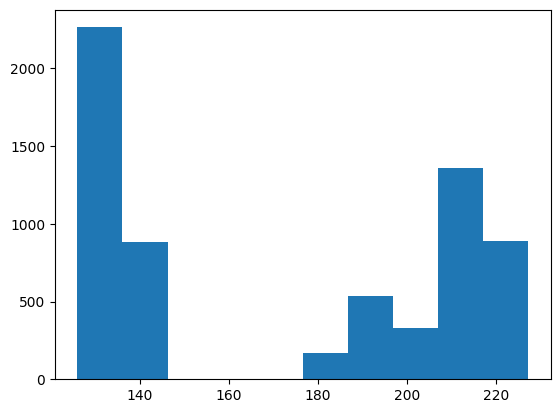

In [ ]:
plt.hist(X[:, 4]) #takes line above and then what? all rows, fourth column fuel price #CPI #normalize = not abs val, but relative to sth else 5-6 ft, divide by min/subtract mean val val center around origin

In [ ]:
x = X.copy() #make copy to keep original and also create new dataset to manpulate data #df.drop(['Date'], axis=1, inplace=True) different function drops column rather than create new copy

In [ ]:
cpi_norm = np.linalg.norm(X[:, 4]) # root of sum of squares #what for? error term avg val norm

In [ ]:
x[:, 4] = x[:, 4] / cpi_norm #setting equal to for what purpose?

In [ ]:
x[:5] #calls 5x5 matrix? #scaled down norm

array([[1.00000000e+00, 0.00000000e+00, 4.23100000e+01, 2.57200000e+00,
        1.49489506e-02, 8.10600000e+00],
       [1.00000000e+00, 1.00000000e+00, 3.85100000e+01, 2.54800000e+00,
        1.49592763e-02, 8.10600000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.99300000e+01, 2.51400000e+00,
        1.49626028e-02, 8.10600000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.66300000e+01, 2.56100000e+00,
        1.49647626e-02, 8.10600000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.65000000e+01, 2.62500000e+00,
        1.49669225e-02, 8.10600000e+00]])

In [ ]:
rows = X.shape[0]
#total number print(rows)

In [ ]:
#X_new = np.hstack(((np.ones((rows,1))), x))# Adding one more column for bias
X_new = x.copy()

In [ ]:
X_new.shape

(6435, 6)

In [ ]:
np.random.seed(42) # Let's set the zero for time being
theta = np.random.randn(1,X_new.shape[1]) # Setting values of theta randomly

#print("Theta : %s" % (theta))

In [ ]:
theta.shape

(1, 6)

In [ ]:
# this is the model
theta #float

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696]])

In [ ]:
y_hat = np.dot(X_new, theta.T)

In [ ]:
y_hat.shape

(6435, 1)

In [ ]:
y_hat[:5] #array of arrays

array([[29.91623447],
       [27.28019859],
       [28.28639682],
       [32.69749192],
       [32.71076582]])

In [ ]:
error = y_hat.ravel() - y_scaled #unravels, remove first array becomes 6435

In [ ]:
error.shape #just vector not matrix , 1

(6435,)

In [ ]:
error.reshape(1,rows).shape

(1, 6435)

In [ ]:
error[:5] #numbers are different than example

array([13.47932547, 10.86062419, 12.16671512, 18.60021602, 17.16269902])

In [ ]:
squared_error = error ** 2

In [ ]:
squared_error_sum = np.sum(squared_error)

In [ ]:
squared_error_sum

13749797.952073341

In [ ]:
1/(2 * rows) * squared_error_sum #avg

1068.360369236468

In [ ]:
iteration = 100000
learning_rate = 0.0003
J = np.zeros(iteration)
#odd --> learning_rate not defined

In [ ]:
update = ((learning_rate/rows) * np.dot(error.reshape(1,rows), X)) #Mr. S code have some errors but still work? also not consistent #derivative of loss fun updated by vals

In [ ]:
update.ravel()

array([3.31217003e-01, 7.47151785e-04, 8.58847113e-01, 4.41886824e-02,
       2.25183739e+00, 1.05898701e-01])

In [ ]:
#import matplotlib.pyplot as plt # data plotting

# **Fix code downward (learning rate, etc)**

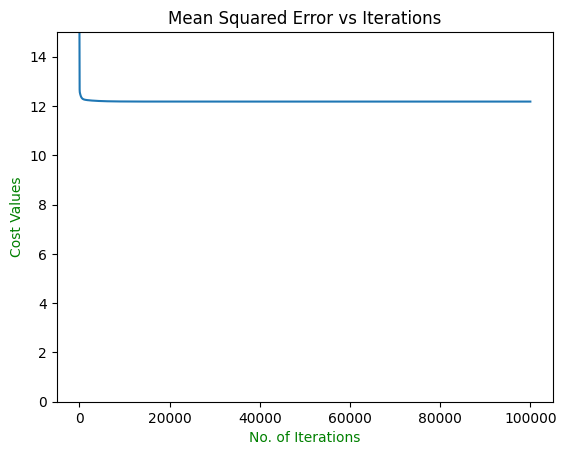

In [ ]:
theta = np.random.randn(1,X_new.shape[1]) # Setting values of theta randomly #learn rate + iter make diff

iteration = 100000
learning_rate = 0.0003
J = np.zeros(iteration)

# Let's train our model to compute values of theta
for i in range(iteration):
    # the predicted value is what we call y_hat
    y_hat = np.dot(X_new, theta.T) #transpose matrix, one-shot multiplication of matrixes to get error
    # the residue, or the error term is difference between what the
    # prediction was and what the true value is
    error = y_hat.ravel() - y_scaled
    # we square the error (MSE) - why? to find error (largest in larger values)
    squared_error = error ** 2
    # now we sum up the error across all samples
    squared_error_mean = np.mean(np.sum(squared_error))
    # we take the mean of this accumulated error
    J[i] = squared_error_mean
    # this is the update rule -
    # we correct our estimate (theta) by a small faction of the gradient
    # gradient caclulation requires calculus - the
    update = ((learning_rate/rows) * np.dot(error.reshape(1,rows), X))
    theta -= update.ravel()
    #learning rate 0.003; slow rate of movement down curve to get down to min value to avoid skipping of values

prediction = np.round(np.dot(X_new, theta.T)) #w final set of theta asymptotes but not 0

ax = plt.subplot(111)
ax.plot(np.arange(iteration), np.log(J))
ax.set_ylim([0,int(np.max(np.log(J)))]) #((0,(max(J)*1.05)))
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

In [ ]:
theta #weights CPI influence on sales

array([[-1.37156279e-01,  1.20928997e+00, -9.58968404e-03,
         2.99916557e+00,  1.12855251e+02,  3.16021748e-01]])

In [ ]:
J[:-10] #loss

array([3994535.59870664, 3453644.64938795, 3080436.17306412, ...,
        195084.68555659,  195084.68549734,  195084.68543808])

In [ ]:
mse = np.sum(np.sqrt((prediction - y_hat)**2)/float(len(y_scaled)) * 100)
print("The model predicted values of Walmart dataset with an overall MSE of %s" % (mse))

The model predicted values of Walmart dataset with an overall MSE of 24.822020342333253


In [ ]:
prediction

array([[11.],
       [13.],
       [11.],
       ...,
       [10.],
       [ 9.],
       [ 9.]])

In [ ]:
y_scaled #act val distribution

array([16.436909 , 16.4195744, 16.1196817, ...,  7.3446436,  7.1812553,
        7.6028143])

In [ ]:
differences = np.abs(prediction - y_scaled)

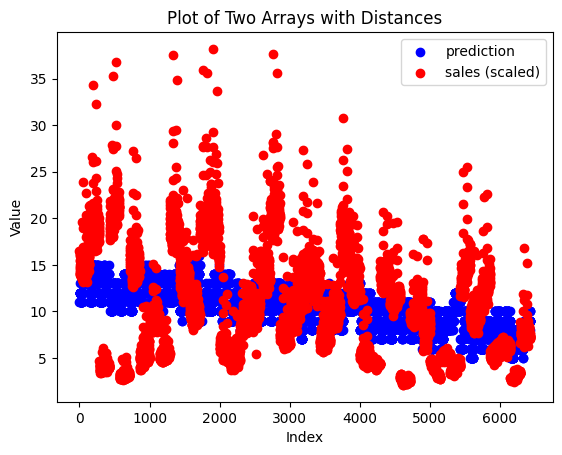

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the points
ax.scatter(range(len(prediction)), prediction, color='blue', label='prediction')
ax.scatter(range(len(y_scaled)), y_scaled, color='red', label='sales (scaled)')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Plot of Two Arrays with Distances')
ax.legend()

# Show the plot
plt.show()

#ax = plt.subplot(111)

#ax.plot(np.arange(1, 6436, 1), y, label='Orignal value', color='red')
#ax.scatter(np.arange(1, 6436, 1), prediction, label='Predicted Value')

#plt.xlabel("Dataset size", color="Green")
#plt.ylabel("Iris Flower (1-3)", color="Green")
#plt.title("Iris Flower (setosa = 1, versicolor = 2, virginica = 3)")

#ax.legend()
#plt.show()
#linear regression, linear model not linear in nature model not suited to data trying to fit accuracy metric does not work

# **Next few lines of code are not needed notes**

In [ ]:
#type(walmart) not really needed in this

In [ ]:
#import numpy as np # linear algebra
#import seaborn as sns # data visualisation and plotting
#import matplotlib.pyplot as plt # data plotting
#import warnings

# Seaborn default configuration
#sns.set_style("darkgrid")

# set the custom size for my graphs
#sns.set(rc={'figure.figsize':(8.7,6.27)})

# filter all warnings
#warnings.filterwarnings('ignore')

# set max column to 999 for displaying in pandas
#pd.options.display.max_columns=999

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [ ]:
#df['Weekly_Sales'].value_counts() #y species, x target corresponds with y date, x weekly sales

In [ ]:
#rows, col = data.shape
#print("Rows : %s, column : %s" % (rows, col))

In [ ]:
#data = data[data['Weekly_Sales'].notnull()]

In [ ]:
#snsdata = data.drop('Date', axis=1)
#g = sns.pairplot(snsdata, hue='Weekly_Sales', markers='x')
#g = g.map_upper(plt.scatter)
#g = g.map_lower(sns.kdeplot)

In [ ]:
#data.columns

In [ ]:
#sns.violinplot(x=data.columns[0], y='Weekly_Sales', data=data, inner='stick', palette='autumn')
#plt.show()
#sns.violinplot(x=data.columns[1], y='Weekly_Sales', data=data, inner='stick', palette='autumn')
#plt.show()
#sns.violinplot(x=data.columns[2], y='Weekly_Sales', data=data, inner='stick', palette='autumn')
#plt.show()
#sns.violinplot(x=data.columns[3], y='Weekly_Sales', data=data, inner='stick', palette='autumn')
#plt.show()

In [ ]:
#mapping = {
    #'Store' : 1,
    #'Date' : 2,
    #'Weekly_Sales' : 3,
    #'Holiday_Flag' : 4,
    #'Temperature' : 5,
    #'Fuel_Price' : 6,
    #'CPI' : 7,
    #'Unemployment' : 8
#}

#X = data.drop(['Date', 'Weekly_Sales'], axis=1).values # Input Feature Values
#y = data.Weekly_Sales.replace(mapping).values.reshape(rows,1) # Output values

#X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [ ]:
#iteration = 10000
#learning_rate = 0.0000004 # ~ 0.007, 0.005, originally 0.003 If you are going by formula, this is actually alpha. based on < derivative
#J = np.zeros(iteration) # 1 x 10000 maxtix

In [ ]:
#accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
#print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))